##  Welcom!!



In [ ]:
if (brain!= 'fullenergy'):  # code is like humor when you have to explain it it's BAD
 print ("orderCoffee")
else:
 print ("KeepCoding")

orderCoffee


#                           😀












# ***Steps of the EDA Process:***

**1. Load data into pandas, NumPy or another similar tool and summarize the data.**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_county = pd.read_csv("county.csv")
data_county

______________________________________________________________________________

**2.Use tables, text and visualizations and telling the story that relates to the data**

Here, the data is leveraged to calculate the number of programme recipients of  by thier county. Since one of the goals of this case study is Specify the most large number and the county by year, therefore it is important to quantify
This data has been developed to support the 

In [ ]:
data_county.describe(include='all')


In [ ]:
data_county.info()

In [ ]:
data_county.head()

In [7]:
data_county.shape  # 


(16736, 9)

In [ ]:
data_county.sample(5, random_state=4)

In [ ]:
data_county.columns    ## here we show columns in Dataset

In [ ]:
data_county.groupby(['county']).sum()

_________________________________________________________________________________

**3. Identify a strategy to deal with missing values:**

It is during the Exploratory Data Analysis (EDA) process that data integrity issues are identified sometimes. After extracting data it is important to include checks for quality assurance even on the first pass through the project workflow. Quality assurance step must implement checks for duplicity and missing values.

In [ ]:
data_county.isnull().sum()
##  I'm lucky one, my data clean 

In [ ]:
sum(data_county.duplicated()) 
## check if there a duplicated value 

In [ ]:
data_county.drop(['UGI'],axis=1,inplace=True)
 ## Remove "UGI" column  

In [ ]:
data_county.drop(['basis'],axis=1,inplace=True)
## Remove "basis" column

In [ ]:
data_county.boxplot()

________________________________________________________________________________

**4. Investigate the data and Graphical representation
 with visualizations and hypothesis testing**

In [ ]:
corr = data_county.corr()
sns.heatmap(corr, annot=True, square=True)
plt.yticks(rotation=1)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


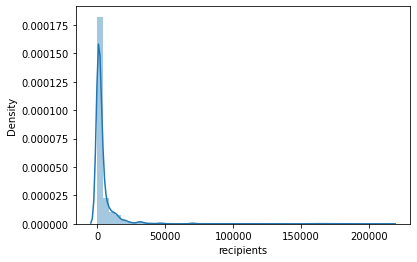

In [23]:
sns.distplot(data_county['recipients'])

__________________________________________________________________________________

 ***We are close to achieving our goals***🥅

***1. Which county have the largest number of recipients?***





In [38]:
data_county['recipients'].max()
## show the largest number

214372

In [37]:
data_county[data_county['recipients']==214372]
## show and select all related details of largest number (max: value)

,period,programme,scheme,scheme_description,basis,UGI,county_code,county,recipients
13594,20202,Working Age Income Supports,PUP,Pandemic Unemployment Claim,Social Insurance,http://data.geohive.ie/resource/county/2ae1962...,DN,Dublin,214372


In [35]:
data_county[['period', 'scheme_description', 'county', 'recipients']].max()   
### Here show the largest number of recipients over years.

period                                 20213
scheme_description    Working Family Payment
county                               Wicklow
recipients                            214372
dtype: object

In [ ]:
data_county['recipients'].nlargest(10)
## show the 101th largest number

_________________________________________________________________________________

***2.Is there any relationship between the total number of recipients in some county with the type of service provided (scheme)??***

In [ ]:
plt.scatter(data_county.recipients,data_county.scheme_description);   
    ## so soory there's no relationship

_________________________________________________________________________________

***3. Is the number of recipients increasing or decreasing over the years?***

In [33]:
data_county.period=data_county.period.str.replace('Q','')  ## here we should transfer data type in column "period" from string to int
data_county.period=data_county.period.astype('int')         ## this step very important to apply  next code line

In [ ]:
data_county.head()

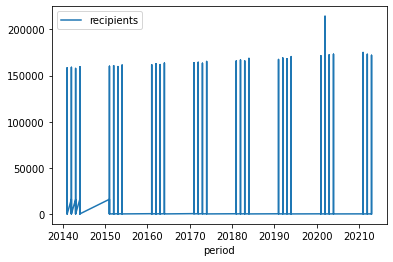

In [ ]:
data_county.plot(x='period', y='recipients', kind='line') 
plt.show()

 .. As can see there are a little alteration in a year 2020Q2, accoroding to the resulte in Q1 the scheme_description was  Pandemic Unemployment Claim

In [34]:
data_county['programme'].max()

'Working Age Income Supports'

____________________________________________________________

***4. Is the service make differences over the year?***

In [ ]:
data_county_grouped = data_county.groupby(['period', 'county']).mean().sort_values(
    'recipients', ascending=True)
data_county_grouped

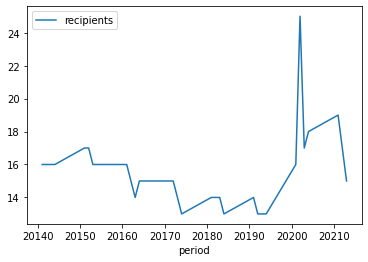

In [ ]:
data_county[['period', 'recipients']][data_county['recipients']> 22000].groupby('period').count().plot()

As can see the number of recipients decreases over time, In our case of study the decreasing is a positve mark for   Except during the COVID-19 pandemic. 

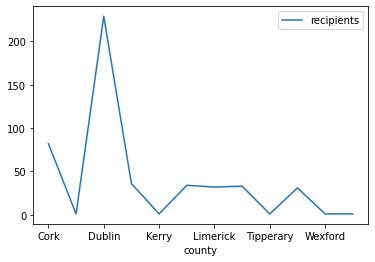

In [ ]:
data_county[['county', 'recipients']][data_county['recipients']> 22000].groupby('county').count().plot()

.. As a result of the previous question, it became clear that Dublin County is the most affected area by the pandemic, as the number of recipients increased in the second quarter of the year 2020. 